In [129]:
import cv2
import math
import numpy as np
from PIL import Image, ImageEnhance

from matplotlib import pyplot as plt
from glob import glob

root = '/home/imagex/imagex_data/networks/optic_disc_seg/train'
images_path = glob(f'{root}/images/*.jpg')
masks_path = glob(f'{root}/masks/*.jpg')
print(images_path[0])
print(masks_path[0])

/home/imagex/imagex_data/networks/optic_disc_seg/train/images/N0044.jpg
/home/imagex/imagex_data/networks/optic_disc_seg/train/masks/N0044.jpg


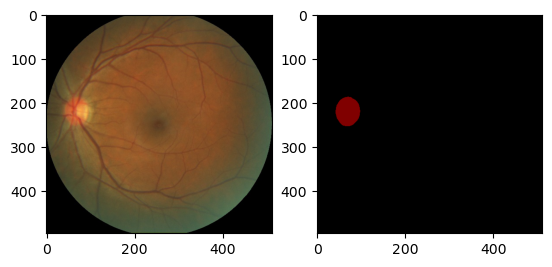

In [4]:
image = Image.open(images_path[0])
mask = Image.open(masks_path[0])

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(mask)

In [130]:
def rescale_size(img_size, target_size, size_divisor=None):
    """保持长宽比缩放"""
    scale = max(target_size) / max(img_size), min(target_size) / max(img_size)
    scale = min(scale)
    rescaled_size = [round(i * scale) for i in img_size]

    if size_divisor:
        rescaled_size = [
            math.ceil(i / size_divisor) * size_divisor
            for i in rescaled_size
        ]
    return rescaled_size, scale

print(rescale_size((400, 300), (200, 200)))

([200, 150], 0.5)


In [6]:
def normalize(im, mean, std):
    """标准差归一化"""
    im = im.astype(np.float32, copy=False) / 255.0
    im -= mean
    im /= std
    return im

mean = np.mean(image)
std = np.std(image)
print(mean, std)
im = normalize(np.asarray(image), mean, std)
print(np.mean(im), np.std(im))

65.85225423177083 44.21148603416702
-1.4836417 0.003921587


[200, 194]


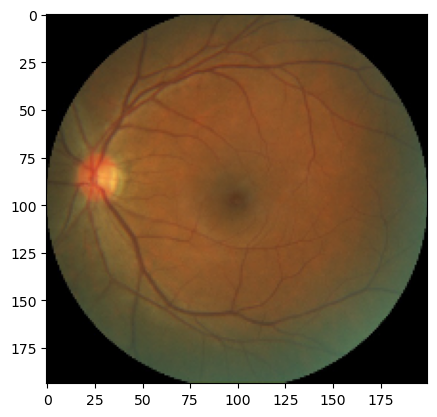

In [7]:
def resize(im, targer_size=608, interp=cv2.INTER_LINEAR):
    if isinstance(targer_size, list) or isinstance(targer_size, tuple):
        w, h = targer_size[0], targer_size[1]
    else:
        w, h = targer_size, targer_size
    im = cv2.resize(im, (w, h), interpolation=interp)
    return im

im = np.asarray(image)
wh = im.shape[1], im.shape[0]
target_size, _ = rescale_size(wh, (200, 200))
im = resize(im, target_size)
print(target_size)
plt.imshow(im)

(217, 224, 3)


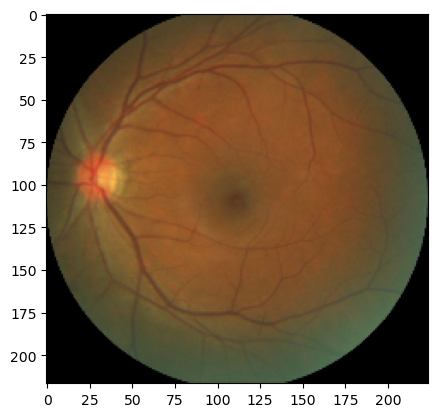

In [8]:
def resize_long(im, long_size=224, interp=cv2.INTER_LINEAR):
    scale = float(long_size) / max(im.shape[0], im.shape[1])
    h, w = [int(round(i * scale)) for i in im.shape[:2]]
    return cv2.resize(im, (w, h), interpolation=interp)

im = np.asarray(image)
im = resize_long(im)
plt.imshow(im)
print(im.shape)

(217, 224, 3)


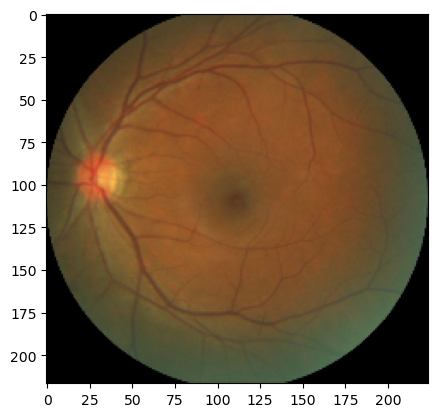

In [9]:
def resize_short(im, short_size=224, interp=cv2.INTER_LINEAR):
    scale = float(short_size) / min(im.shape[0], im.shape[1])
    h, w = [int(round(i * scale)) for i in im.shape[:2]]
    return cv2.resize(im, (w, h), interpolation=interp)

im = np.asarray(image)
im = resize_long(im)
print(im.shape)
plt.imshow(im)

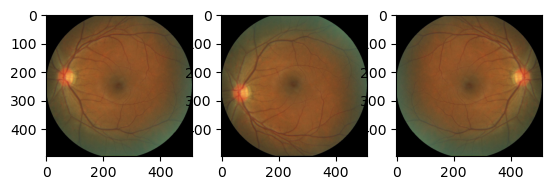

In [10]:
def vertical_flip(im:np.ndarray):
    if im.ndim == 3:
        im = im[:, ::-1, :]
    elif im.ndim == 2:
        im = im[:, ::-1]
    return im

def horizontal_flip(im:np.ndarray):
    if im.ndim == 3:
        im = im[::-1, :, :]
    elif im.ndim == 2:
        im = im[::-1, :]
    return im

im = np.asarray(image)
im = horizontal_flip(im)
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(im)

im = np.asarray(image)
im = vertical_flip(im)
plt.subplot(1, 3, 3)
plt.imshow(im)

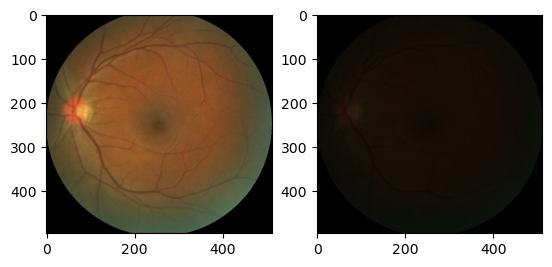

In [11]:
def brightness(im, low, high):
    delta = np.random.uniform(low, high)
    im = ImageEnhance.Brightness(im).enhance(delta)
    return im

im = np.asarray(image)
im = brightness(image, 0.1, 0.5)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(im)

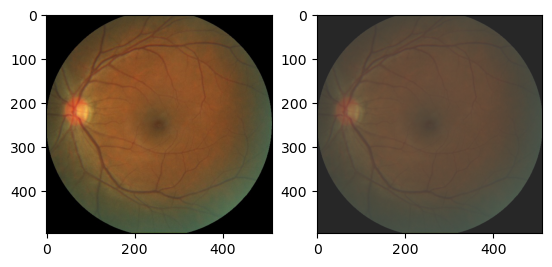

In [12]:
def contrast(im, low, high):
    delta = np.random.uniform(low, high)
    return ImageEnhance.Contrast(im).enhance(delta)

im = contrast(image, .1, 0.5)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(im)

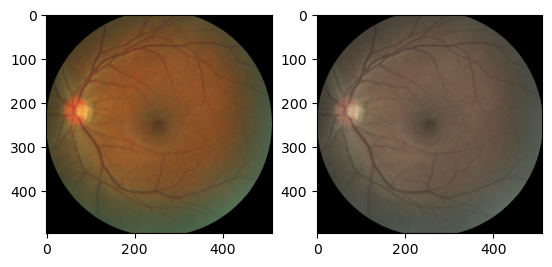

In [13]:
def saturation(im, low, high):
    """饱和度"""
    delta = np.random.uniform(low, high)
    return ImageEnhance.Color(im).enhance(delta)

im = saturation(image, -0.5, 0.5)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(im)

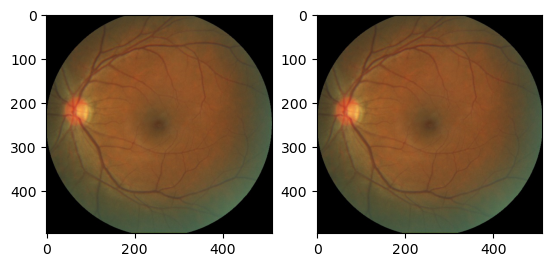

In [14]:
def hue(im, low, high):
    """色彩"""
    delta = np.random.uniform(low, high)
    im = np.array(im.convert('HSV'))
    im[:, :, 0] = im[:, :, 0] + delta
    return Image.fromarray(im, mode='HSV').convert('RGB')

im = hue(image, -0.5, 0.5)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(im)

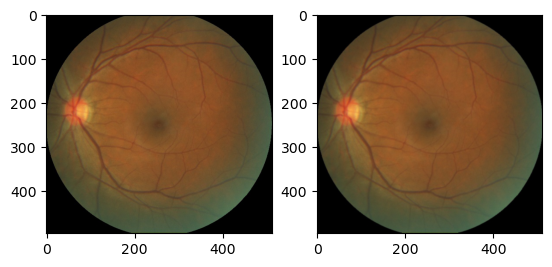

In [15]:
def sharpness(im, low, high):
    """锐度"""
    delta = np.random.uniform(low, high)
    return ImageEnhance.Sharpness(im).enhance(delta)

im = sharpness(image, -0.5, 0.5)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(im)

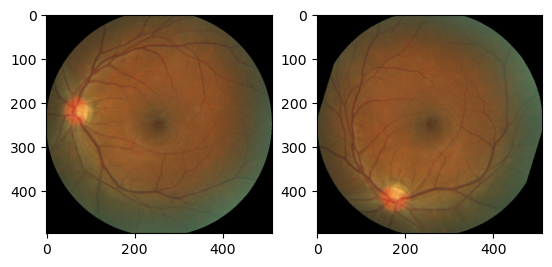

In [16]:
def rotate(im, low, high):
    """锐度"""
    delta = np.random.uniform(low, high)
    return im.rotate(int(delta))

im = rotate(image, 0, 360)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(im)

In [17]:
def mask_to_onehot(mask, num_classes):
    print(mask.shape)
    _mask = [mask == i for i in range(num_classes)]
    _mask = np.array(_mask).astype(np.uint8)
    return _mask

im = np.asarray(mask)
im = im.squeeze()
im = mask_to_onehot(im, 2)
print(im.shape)

(496, 512)
(2, 496, 512)


In [20]:
import random
import cv2
import math
import numpy as np
from PIL import Image
from functools import reduce
KEY_FIELDS = 'trans_fields'

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, data:dict):
        assert 'img' in data

        data['img'] = cv2.imread(data['img'])
        assert isinstance(data['img'], np.ndarray)
        if data['img'].ndim == 3:
            # BGR to RGB
            data['img'] = cv2.cvtColor(data['img'], cv2.COLOR_BGR2RGB)
        
        data['label'] = np.asarray(Image.open(data['label']))
        # 保存图像shape， 用于推理和验证
        if 'trans_info' not in data.keys():
            data['trans_info'] = []
        
        for trans in self.transforms:
            data = trans(data)

        if data['img'].ndim == 2:
            # HW To CHW
            data['img'] = data['img'][None, :, :]
        else:
            # HWC to CHW
            data['img'] = np.transpose(data['img'], (2, 0, 1))
        return data

(3, 496, 512)
(496, 512)


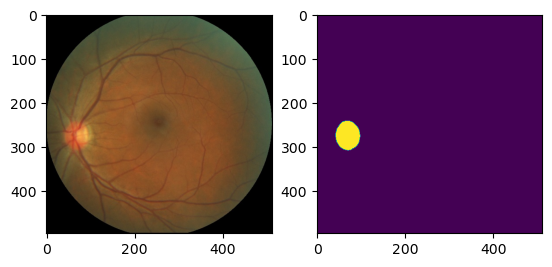

In [35]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomHorizontalFlip:
    """随机水平翻转"""
    def __init__(self, prob=0.5) -> None:
        self.prob = prob
    
    def __call__(self, data:dict) -> dict:
        if random.random() < self.prob:
            data['img'] = horizontal_flip(data['img'])
            for key in data.get(KEY_FIELDS, []):
                data[key] = horizontal_flip(data[key])
        return data

compose = Compose([RandomHorizontalFlip()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
plt.imshow(np.transpose(data['img'], (1, 2, 0)))
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 496, 512)
(496, 512)


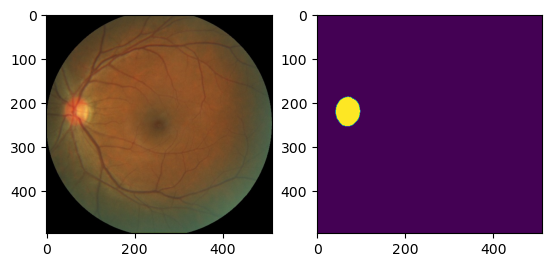

In [126]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomVerticalFlip:
    """随机垂直翻转"""
    def __init__(self, prob=0.5) -> None:
        self.prob = prob
    
    def __call__(self, data:dict) -> dict:
        if random.random() < self.prob:
            data['img'] = vertical_flip(data['img'])
            for key in data.get(KEY_FIELDS, []):
                data[key] = vertical_flip(data[key])
        return data

compose = Compose([RandomVerticalFlip(.5)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
plt.imshow(np.transpose(data['img'], (1, 2, 0)))
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 512, 512)
(512, 512)


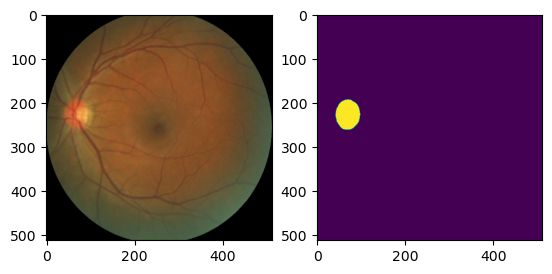

In [138]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class Resize:
    """尺寸修改"""
     # The interpolation mode
    interp_dict = {
        'NEAREST': cv2.INTER_NEAREST,
        'LINEAR': cv2.INTER_LINEAR,
        'CUBIC': cv2.INTER_CUBIC,
        'AREA': cv2.INTER_AREA,
        'LANCZOS4': cv2.INTER_LANCZOS4
    }
    def __init__(self, target_size=(512, 512), size_divisor=None, interp='LINEAR') -> None:
        self.target_size = target_size
        self.size_divisor = size_divisor
        self.interp = interp
    
    def __call__(self, data:dict) -> dict:
        data['trans_info'].append(('resize', data['img'].shape[0:2]))
        if self.interp == "RANDOM":
            interp = random.choice(list(self.interp_dict.values()))
        else:
            interp = self.interp_dict[self.interp]
        
        h, w = data['img'].shape[:2]
        target_size, _ = rescale_size((w, h), self.target_size, self.size_divisor)
        
        data['img'] = resize(data['img'], target_size, interp)
        for key in data.get(KEY_FIELDS, []):
            data[key] = resize(data[key], target_size, interp)
        return data

compose = Compose([Resize((500, 500), 32)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
plt.imshow(np.transpose(data['img'], (1, 2, 0)))
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 517, 534)
(517, 534)


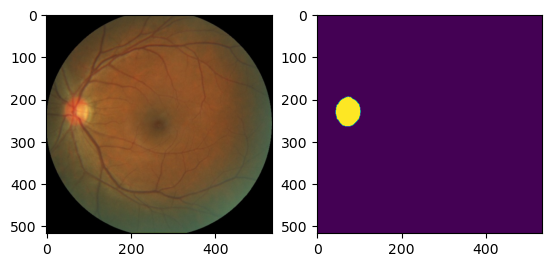

In [147]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class ResizeRangeScaling:
    """随机尺寸缩放"""
    def __init__(self, min_value=400, max_value=600):
        assert max_value >= min_value
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, data:dict)->dict:
        if self.min_value == self.max_value:
            random_size = self.max_value
        else:
            random_size = int(np.random.uniform(self.min_value, self.max_value + .5))
        
        data['img'] = resize_long(data['img'], random_size, cv2.INTER_LINEAR)
        for key in data.get(KEY_FIELDS, []):
            data[key] = resize_long(data[key], random_size, cv2.INTER_NEAREST)
        return data

compose = Compose([ResizeRangeScaling()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
plt.imshow(np.transpose(data['img'], (1, 2, 0)))
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 496, 512)
(496, 512)


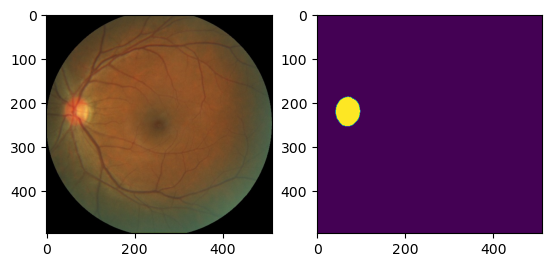

In [155]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class ResizeRangeScaling:
    """随机比例缩放"""
    def __init__(self, min_factor=0.75, max_factor=1.25, scale_step=0.25):
        assert max_factor >= min_factor
        self.min_factor = min_factor
        self.max_factor = max_factor
        self.scale_step = scale_step

    def __call__(self, data:dict)->dict:
        if self.min_factor == self.max_factor:
            scale_factor = self.max_factor
        elif self.scale_step == 0:
            scale_factor = np.random.uniform(self.min_factor, self.max_factor)
        else:
            num_steps = int((self.max_factor - self.min_factor) / self.scale_step + 1)
            scale_factors = np.linspace(self.min_factor, self.max_factor, num_steps).tolist()
            scale_factor = random.choice(scale_factors)
        
        w = int(round(scale_factor * data['img'].shape[1]))
        h = int(round(scale_factor * data['img'].shape[0]))
        
        data['img'] = resize(data['img'], (w, h), cv2.INTER_LINEAR)
        for key in data.get(KEY_FIELDS, []):
            data[key] = resize(data[key], (w, h), cv2.INTER_NEAREST)
        return data

compose = Compose([ResizeRangeScaling()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
plt.imshow(np.transpose(data['img'], (1, 2, 0)))
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 496, 512)
(496, 512)


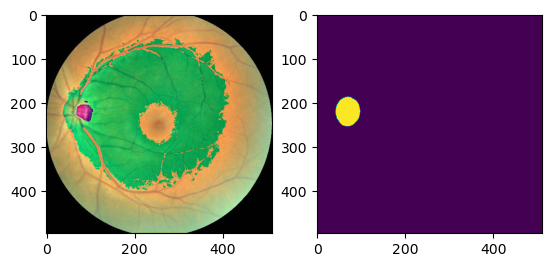

In [173]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class Normallize:
    """图片归一化"""
    def __init__(self, mean=(0.5,), std=(0.5,)):
        assert isinstance(mean, (list, tuple))
        assert isinstance(std, (list, tuple))
        assert len(mean) in [1, 3]
        assert len(std) in [1,3]

        self.mean = np.array(mean)
        self.std = np.array(std)
        if reduce(lambda x, y: x * y, self.std) == 0:
            raise ValueError('{}: std is invalid!'.format(self))
    
    def __call__(self, data:dict)->dict:
        data['img'] = normalize(data['img'], self.mean, self.std)
        return data

compose = Compose([Normallize()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im*255, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 600, 600)
(600, 600)


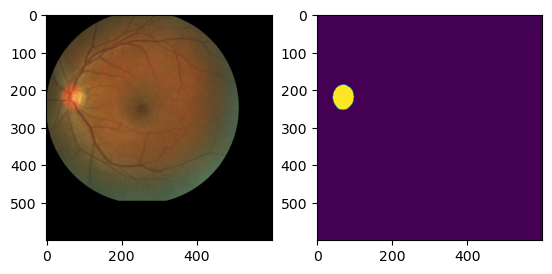

In [198]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class Padding:
    """添加边框"""
    def __init__(self, target_size, im_padding=127.5, label_padding=255) -> None:

        self.target_size = target_size
        self.im_padding = im_padding
        self.label_padding = label_padding
    
    def __call__(self, data:dict)->dict:
        h, w = data['img'].shape[:2]
        data['trans_info'].append(('padding', (h, w)))

        if isinstance(self.target_size, int):
            target_w = self.target_size
            target_h = self.target_size
        else:
            target_w, target_h = self.target_size
        
        pad_h = target_h - h
        pad_w = target_w - w
        assert pad_h >= 0 and pad_w >= 0

        img_channels = 1 if data['img'].ndim == 2 else data['img'].shape[2]

        data['img'] = cv2.copyMakeBorder(
                data['img'],
                0,
                pad_h,
                0,
                pad_w,
                cv2.BORDER_CONSTANT,
                value=(self.im_padding, ) * img_channels)
        for key in data.get(KEY_FIELDS, []):
            data[key] = cv2.copyMakeBorder(
                data[key],
                0,
                pad_h,
                0,
                pad_w,
                cv2.BORDER_CONSTANT,
                value=self.label_padding)
        return data

compose = Compose([Padding((600, 600), 0, 0)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 496, 992)
(496, 992)


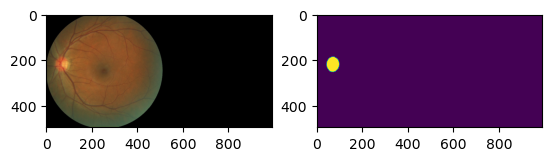

In [207]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class PaddingByAspectRatio:
    """添加边框"""
    def __init__(self, aspect_ratio=1, im_padding=127.5, label_padding=255) -> None:

        self.aspect_ratio = aspect_ratio
        self.im_padding = im_padding
        self.label_padding = label_padding
    
    def __call__(self, data:dict)->dict:
        h, w = data['img'].shape[:2]
        
        ratio = w / h
        if ratio == self.aspect_ratio:
            return data
        elif ratio > self.aspect_ratio:
            h = int(w / self.aspect_ratio)
        else:
            w = int(h * self.aspect_ratio)
        padding = Padding((w, h), self.im_padding, self.label_padding)
        return padding(data)

compose = Compose([PaddingByAspectRatio(2, 0, 0)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 400, 400)
(400, 400)


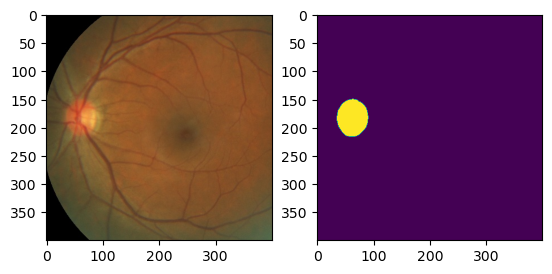

In [252]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomPaddingCrop:
    """随机裁剪"""
    def __init__(self, crop_size=(512, 512), im_padding=127.5, label_padding=255):
        self.crop_size = crop_size
        self.im_padding = im_padding
        self.label_padding = label_padding

    def __call__(self, data:dict)->dict:
        if isinstance(self.crop_size, int):
            crop_w = self.crop_size
            crop_h = self.crop_size
        else:
            crop_w, crop_h = self.crop_size
        
        img_h, img_w = data['img'].shape[:2]
        if img_h == crop_h and img_w == crop_w:
            return data
        
        pad_h = max(crop_h - img_h, 0)
        pad_w = max(crop_w - img_w, 0)
        img_channels = 1 if data['img'].ndim == 2 else data['img'].shape[2]

        # 裁剪后尺寸比原尺寸大，添加边框
        if (pad_h > 0 or pad_w > 0):
            data['img'] = cv2.copyMakeBorder(
                data['img'],
                0,
                pad_h,
                0,
                pad_w,
                cv2.BORDER_CONSTANT,
                value=(self.im_padding, ) * img_channels)
            for key in data.get(KEY_FIELDS, []):
                data[key] = cv2.copyMakeBorder(
                    data[key],
                    0,
                    pad_h,
                    0,
                    pad_w,
                    cv2.BORDER_CONSTANT,
                    value=self.label_padding)
            # 裁剪后的尺寸
            img_h, img_w = data['img'].shape[:2]

        # 裁剪
        if crop_h > 0 and crop_w > 0:
            # 随机裁剪开始位置
            h_off = np.random.randint(img_h - crop_h + 1)
            w_off = np.random.randint(img_w - crop_w + 1)

            if data['img'].ndim == 2:
                data['img'] = data['img'][h_off:(crop_h + h_off),
                                            w_off:(w_off + crop_w)]
            else:
                data['img'] = data['img'][h_off:(crop_h + h_off),
                                            w_off:(w_off + crop_w), :]
            for key in data.get(KEY_FIELDS, []):
                data[key] = data[key][h_off:(crop_h + h_off), w_off:(
                    w_off + crop_w)]
        return data

compose = Compose([RandomPaddingCrop((400, 400), 127.5, 0)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 409, 483)
(409, 483)


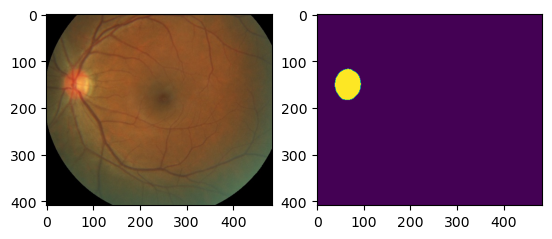

In [288]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomCenterCrop:
    """随机中心裁剪"""
    def __init__(self, retain_ratio=(0.5, 0.5)):
        self.retain_ratio = retain_ratio

    def __call__(self, data:dict)->dict:
        retain_width, retain_height = self.retain_ratio
        img_height, img_width = data['img'].shape[:2]

        if retain_height == 1. and retain_width == 1.:
            return data

        # 随机裁剪尺寸
        rand_w = np.random.randint(img_width * (1 - retain_width))
        rand_h = np.random.randint(img_height * (1 - retain_height))
        # 随机裁剪起始
        offset_w = 0 if rand_w == 0 else np.random.randint(rand_w)
        offset_h = 0 if rand_w == 0 else np.random.randint(rand_h)
        
        p0 = offset_h
        p1 = img_height + offset_h - rand_h
        p2 = offset_w
        p3 = img_height + offset_w - rand_w
        if data['img'].ndim == 2:
            data['img'] = data['img'][p0:p1, p2:p3]
        else:
            data['img'] = data['img'][p0:p1, p2:p3]
        for key in data.get(KEY_FIELDS, []):
            data[key] = data[key][p0:p1, p2:p3]
        return data

compose = Compose([RandomCenterCrop((.8, .8))])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 800, 700)
(800, 700)


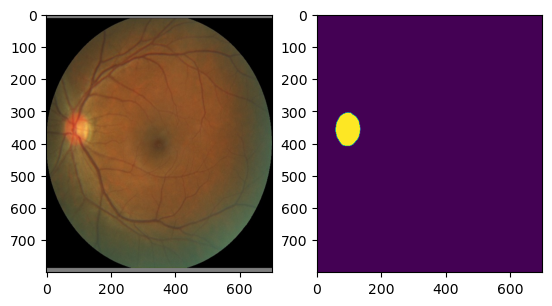

In [316]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class ScalePadding:
    """中心添加边框并修改尺寸"""
    def __init__(self, target_size=(512, 512), im_padding=127.5, label_padding=255):
        self.target_size = target_size
        self.im_padding = im_padding
        self.label_padding = label_padding

    def __call__(self, data:dict)->dict:
        h, w = data['img'].shape[:2]
        image_channels = 1 if data['img'].ndim == 2 else data['img'].shape[2]

        # 创建方图
        if data['img'].ndim == 2:
            new_im = np.zeros((max(h, w), max(h, w))) + self.im_padding
        else:
            new_im = np.zeros((max(h, w), max(h, w), image_channels)) + self.im_padding

        if 'label' in data[KEY_FIELDS]:
            new_label = np.zeros((max(h, w), max(h, w))) + self.label_padding
        
        # 粘贴图片
        if h > w:
            padding = int((h - w) / 2)
            if data['img'].ndim == 2:
                new_im[:, padding:padding + w] = data['img']
            else:
                new_im[:, padding:padding + w, :] = data['img']
            if 'label' in data[KEY_FIELDS]:
                new_label[:, padding:padding + w] = data['label']
        else:
            padding = int((w - h) / 2)
            if data['img'].ndim == 2:
                new_im[padding:padding + h, :] = data['img']
            else:
                new_im[padding:padding + h, :, :] = data['img']
            if 'label' in data[KEY_FIELDS]:
                new_label[padding:padding + h, :] = data['label']
        
        data['img'] = resize(np.uint8(new_im), self.target_size, cv2.INTER_CUBIC)
        if 'label' in data[KEY_FIELDS]:
            data['label'] = resize(np.uint8(new_label), self.target_size, cv2.INTER_CUBIC)
        return data
compose = Compose([ScalePadding((700, 800), 127.5, 0)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

6.053545837962108
(3, 496, 512)
(496, 512)


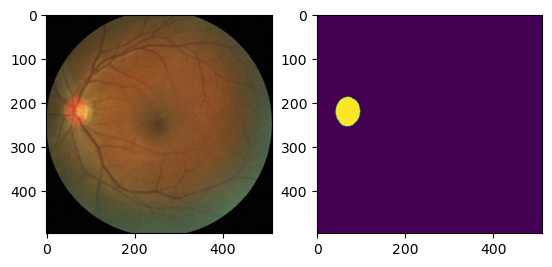

In [333]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomNoise:
    """随机噪声"""
    def __init__(self, prob=0.5, max_sigma=10.0) -> None:
        self.prob = prob
        self.max_sigma = max_sigma
    
    def __call__(self, data:dict)->dict:
        if random.random() < self.prob:
            mu = 0
            sigma = random.random() * self.max_sigma
            print(sigma)
            data['img'] = np.array(data['img'], dtype=np.float32)
            data['img'] += np.random.normal(mu, sigma, data['img'].shape)
            data['img'][data['img'] > 255] = 255
            data['img'][data['img'] < 0] = 0
        return data

compose = Compose([RandomNoise()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 496, 512)
(496, 512)


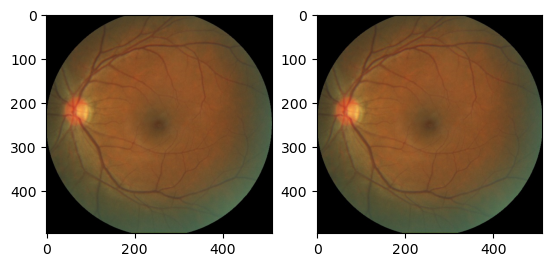

In [376]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomBlur:
    """随机模糊"""
    def __init__(self, prob=0.1, blur_type="gaussian"):
        self.prob = prob
        self.blur_type = blur_type
    
    def __call__(self, data:dict)->dict:
        if self.prob <= 0:
            n = 0
        elif self.prob >= 1:
            n = 1
        else:
            n = int(1.0 / self.prob)

        if n <= 0 or np.random.randint(0, n) != 0:
            return data
        
        radius = np.random.randint(3, 10)
        if radius % 2 != 1:
            radius += 1
        if radius > 9:
            radius = 9
        data['img'] = np.array(data['img'], dtype=np.uint8)

        if self.blur_type == 'random':
            blur_type = np.random.choice(['median', 'blur', 'gaussian'])
        else:
            blur_type = self.blur_type

        print(radius, blur_type)

        if blur_type == "median":
            data['img'] = cv2.medianBlur(data['img'], radius)
        elif blur_type == 'blur':
            data['img'] = cv2.blur(data['img'], (radius, radius))
        else:
            data['img'] = cv2.GaussianBlur(data['img'], (radius, radius), 0, 0)

        data['img'] = np.array(data['img'], dtype=np.float32)
        return data

compose = Compose([RandomBlur(0.5, 'random')])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(image)

(3, 496, 512)
(496, 512)


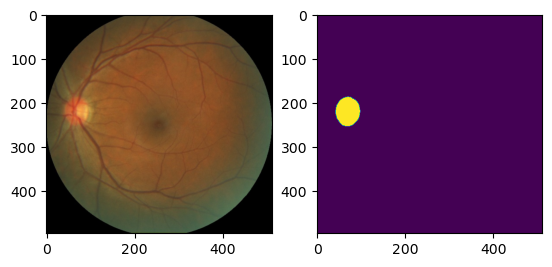

In [399]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomRotation:
    """随机旋转"""
    def __init__(self, max_rotation, im_padding, label_padding) -> None:
        self.max_rotation = max_rotation
        self.im_padding = im_padding
        self.label_padding = label_padding

    def __call__(self, data:dict)->dict:
        if self.max_rotation <= 0:
            return data
        
        h, w = data['img'].shape[:2]
        img_channels = 1 if data['img'].ndim == 2 else data['img'].shape[2]
        do_rotation = np.random.uniform(-self.max_rotation, self.max_rotation)

        pc = (w // 2, h // 2)
        r = cv2.getRotationMatrix2D(pc, do_rotation, 1.0)
        cos = np.abs(r[0, 0])
        sin = np.abs(r[0, 1])

        nw = int((h * sin) + (w * cos))
        nh = int((h * cos) + (w * sin))

        (cx, cy) = pc
        r[0, 2] += (nw / 2) - cx
        r[1, 2] += (nh / 2) - cy
        dsize = (nw, nh)
        data['img'] = cv2.warpAffine(
            data['img'],
            r,
            dsize=dsize,
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(self.im_padding, ) * img_channels)
        for key in data.get(KEY_FIELDS, []):
            data[key] = cv2.warpAffine(
                data[key],
                r,
                dsize=dsize,
                flags=cv2.INTER_NEAREST,
                borderMode=cv2.BORDER_CONSTANT,
                borderValue=self.label_padding)
        return data

compose = Compose([RandomRotation(15, 0, 0)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

383 496 457 512
(3, 496, 512)
(496, 512)


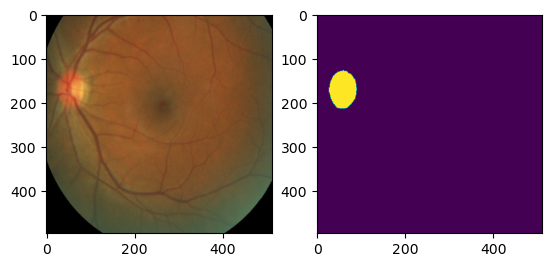

In [424]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomScaleAspect:
    """随机横纵比"""
    def __init__(self, min_scale=0.5, aspect_ratio=0.33):
        self.min_scale = min_scale
        self.aspect_ratio = aspect_ratio
    
    def __call__(self, data:dict)->dict:
        if self.min_scale == 0 or self.aspect_ratio == 0:
            return data
        
        h, w = data['img'].shape[:2]
        for i in range(10):
            area = w * h
            target_area = area * np.random.uniform(self.min_scale, 1.0)
            aspect_ratio = np.random.uniform(self.aspect_ratio, 1.0/self.aspect_ratio)

            dw = int(np.sqrt(target_area * 1.0 * aspect_ratio))
            dh = int(np.sqrt(target_area * 1.0 / aspect_ratio))
            if (np.random.randint(10) < 5):
                dw, dh = dh, dw
            
            if dh < h and dw < w:
                print(dh, h, dw, w)
                h1 = np.random.randint(0, h - dh)
                w1 = np.random.randint(0, w - dh)
                if data['img'].ndim == 2:
                    data['img'] = data['img'][h1:(h1 + dh), w1:(w1 + dw)]
                else:
                    data['img'] = data['img'][h1:(h1 + dh), w1:(w1 + dw), :]
                data['img'] = cv2.resize(data['img'], (w, h), interpolation=cv2.INTER_LINEAR)
                for key in data.get(KEY_FIELDS, []):
                    data[key] = data[key][h1:(h1 + dh), w1:(w1 + dw)]
                    data[key] = cv2.resize(data[key], (w, h), interpolation=cv2.INTER_NEAREST)
                break
        return data

compose = Compose([RandomScaleAspect()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 496, 512)
(496, 512)


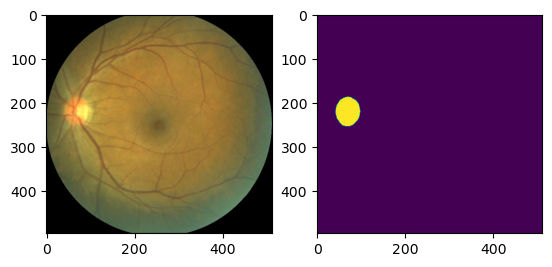

In [439]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomDistort:
    """随机构建图像"""
    def __init__(self,
                 brightness_range=0.5,
                 brightness_prob=0.5,
                 contrast_range=0.5,
                 contrast_prob=0.5,
                 saturation_range=0.5,
                 saturation_prob=0.5,
                 hue_range=18,
                 hue_prob=0.5,
                 sharpness_range=0.5,
                 sharpness_prob=0):
        self.brightness_range = brightness_range
        self.brightness_prob = brightness_prob
        self.contrast_range = contrast_range
        self.contrast_prob = contrast_prob
        self.saturation_range = saturation_range
        self.saturation_prob = saturation_prob
        self.hue_range = hue_range
        self.hue_prob = hue_prob
        self.sharpness_range = sharpness_range
        self.sharpness_prob = sharpness_prob

    def __call__(self, data:dict)->dict:
        brightness_lower = 1 - self.brightness_range
        brightness_upper = 1 + self.brightness_range
        contrast_lower = 1 - self.contrast_range
        contrast_upper = 1 + self.contrast_range
        saturation_lower = 1 - self.saturation_range
        saturation_upper = 1 + self.saturation_range
        hue_lower = -self.hue_range
        hue_upper = self.hue_range
        sharpness_lower = 1 - self.sharpness_range
        sharpness_upper = 1 + self.sharpness_range
        ops = [brightness, contrast, saturation, sharpness]
        if data['img'].ndim > 2:
            ops.append(hue)
        random.shuffle(ops)

        params_dict = {
            'brightness': {
                'low': brightness_lower,
                'high': brightness_upper
            },
            'contrast': {
                'low': contrast_lower,
                'high': contrast_upper
            },
            'saturation': {
                'low': saturation_lower,
                'high': saturation_upper
            },
            'hue': {
                'low': hue_lower,
                'high': hue_upper
            },
            'sharpness': {
                'low': sharpness_lower,
                'high': sharpness_upper,
            }
        }
        prob_dict = {
            'brightness': self.brightness_prob,
            'contrast': self.contrast_prob,
            'saturation': self.saturation_prob,
            'hue': self.hue_prob,
            'sharpness': self.sharpness_prob
        }
        data['img'] = data['img'].astype('uint8')
        data['img'] = Image.fromarray(data['img'])
        for id in range(len(ops)):
            params = params_dict[ops[id].__name__]
            prob = prob_dict[ops[id].__name__]
            params['im'] = data['img']
            if np.random.uniform(0, 1) < prob:
                data['img'] = ops[id](**params)
        data['img'] = np.asarray(data['img']).astype('float32')
        return data

compose = Compose([RandomDistort()])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])

(3, 600, 600)
(600, 600)


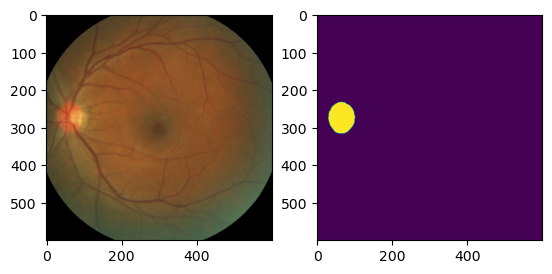

In [470]:
data = {}
data['img'] = images_path[0]
data['label'] = masks_path[0]
data[KEY_FIELDS] = ['label']

class RandomAffine:
    def __init__(self,
                 size=(224, 224),
                 translation_offset=0,
                 max_rotation=15,
                 min_scale_factor=0.75,
                 max_scale_factor=1.25,
                 im_padding_value=128,
                 label_padding_value=255):
        self.size = size
        self.translation_offset = translation_offset
        self.max_rotation = max_rotation
        self.min_scale_factor = min_scale_factor
        self.max_scale_factor = max_scale_factor
        self.im_padding_value = im_padding_value
        self.label_padding_value = label_padding_value

    def __call__(self, data:dict)->dict:

        w, h = self.size
        bbox = [0, 0, data['img'].shape[1] - 1, data['img'].shape[0] - 1]
        x_offset = (random.random() - 0.5) * 2 * self.translation_offset
        y_offset = (random.random() - 0.5) * 2 * self.translation_offset
        dx = (w - (bbox[2] + bbox[0])) / 2.0
        dy = (h - (bbox[3] + bbox[1])) / 2.0

        matrix_trans = np.array([[1.0, 0, dx], [0, 1.0, dy], [0, 0, 1.0]])

        angle = random.random() * 2 * self.max_rotation - self.max_rotation
        scale = random.random() * (self.max_scale_factor - self.min_scale_factor
                                   ) + self.min_scale_factor
        scale *= np.mean(
            [float(w) / (bbox[2] - bbox[0]), float(h) / (bbox[3] - bbox[1])])
        alpha = scale * math.cos(angle / 180.0 * math.pi)
        beta = scale * math.sin(angle / 180.0 * math.pi)

        centerx = w / 2.0 + x_offset
        centery = h / 2.0 + y_offset
        matrix = np.array(
            [[alpha, beta, (1 - alpha) * centerx - beta * centery],
             [-beta, alpha, beta * centerx + (1 - alpha) * centery],
             [0, 0, 1.0]])

        matrix = matrix.dot(matrix_trans)[0:2, :]
        img_channels = 1 if data['img'].ndim == 2 else data['img'].shape[2]
        data['img'] = cv2.warpAffine(
            np.uint8(data['img']),
            matrix,
            tuple(self.size),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(self.im_padding_value, ) * img_channels)
        for key in data.get(KEY_FIELDS, []):
            data[key] = cv2.warpAffine(
                np.uint8(data[key]),
                matrix,
                tuple(self.size),
                flags=cv2.INTER_NEAREST,
                borderMode=cv2.BORDER_CONSTANT,
                borderValue=self.label_padding_value)
        return data

compose = Compose([RandomAffine((600, 600), im_padding_value=0, label_padding_value=0)])
data = compose(data)

print(data['img'].shape)
print(data['label'].shape)

plt.subplot(1, 2, 1)
im = np.transpose(data['img'], (1, 2, 0))
im = np.array(im, dtype=np.uint8)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(data['label'])